In [34]:
# Group Members
# Shikash Algu: 2373769
# Byron Gomes: 0709942R
# Clarise Poobalan: 383321
# Nicolaas Cawood: 2376182

import numpy as np
#from environments.gridworld import GridworldEnv
#import timeit
import matplotlib.pyplot as plt
#import pandas as pd
#import math
#import random
import gym

In [3]:
env = gym.make('CliffWalking-v0')

In [12]:
state = env.reset()
env.render()
state

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



36

In [13]:
action = env.action_space.sample()
action

0

In [71]:
def Sarsa_lam(env,episodes,epsilon,alpha,lambda_s,gamma):
    #Initialize Q(s,a) and e(s,a)
    Q=np.zeros((env.nS,env.nA))
    e=np.zeros((env.nS,env.nA))   
    hold_array=np.zeros((env.shape[0],env.shape[1],episodes))
    
    #Repeat (for each step of episode)    
    for episode in range(episodes):
        state = env.reset()
        action = env.action_space.sample()
        
        #repeat for each step in episode
       # while True:
        count=0
        for i in range(1000):        
            #Take action a, observe r and s'
            state_prime, reward, done, info = env.step(action)

            #Choose a' from s' using policy deriver from greedy
            action_prime=np.argmax(Q[state_prime])
            if np.random.random()<epsilon:
                action_prime=env.action_space.sample() # A random action with prob eps,#bandit algo.

            #Gamma
            delta=reward+gamma*Q[state_prime,action_prime]-Q[state,action]
            e[state,action]=e[state,action]+1

            #for all s,a
            for s in range(env.nS):
                for a in range(env.nA):
                    Q[s,a]=Q[s,a]+alpha*delta*e[s,a]
                    e[s,a]=gamma*lambda_s*e[s,a]

            state=state_prime
            action=action_prime

            if done:
              #  print("Done",count)
               # print(Q)
                hold_array[:,:,episode]=np.reshape(Q.max(axis=1),(4,12))
                break
            count+=1
            
    return hold_array

In [115]:
episodes=500
epsilon=0.1
alpha=0.5
gamma=1

Q_0=Sarsa_lam(env,episodes,epsilon,alpha,0,gamma)#(env,episodes,epsilon,alpha,lambda_s,gamma):,{0,0.3,0.5,0.7,0.9}
print("0")
Q_1=Sarsa_lam(env,episodes,epsilon,alpha,0.3,gamma)
print("1")
Q_2=Sarsa_lam(env,episodes,epsilon,alpha,0.5,gamma)
print("2")
Q_3=Sarsa_lam(env,episodes,epsilon,alpha,0.7,gamma)
print("3")
Q_4=Sarsa_lam(env,episodes,epsilon,alpha,0.9,gamma)


0
1
2
3


In [116]:
Q_0.shapep

(4, 12, 500)

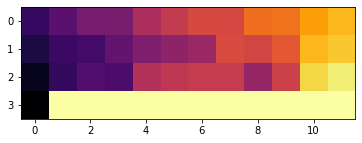

In [131]:
plt.imshow(Q_0[:,:,499],cmap="inferno")

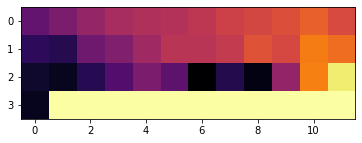

In [132]:
plt.imshow(Q_1[:,:,499],cmap="inferno")

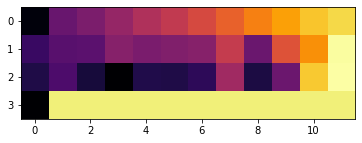

In [133]:
plt.imshow(Q_2[:,:,499],cmap="inferno")

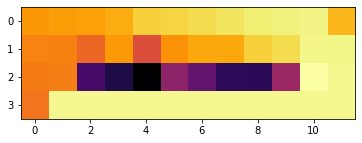

In [134]:
plt.imshow(Q_3[:,:,499],cmap="inferno")

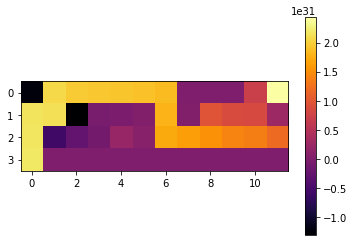

In [136]:
plt.imshow(Q_4[:,:,498],cmap="inferno")
plt.colorbar()

In [50]:
import cv2
import numpy as np
 

frameSize = (500, 500)

out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, frameSize)

for i in range(0,100):
    img = np.ones((500, 500, 3), dtype=np.uint8)*i
    out.write(img)

out.release()